# Rede Neural Recorrente usando dados da Bolsa de valores


In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
base = pd.read_csv("petr4_treinamento.csv")

In [3]:
base.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0


In [4]:
base = base.dropna()

# Base de Treinamento usando a coluna Open do dataset

In [7]:
base_treinamento = base.iloc[:, 1:2].values
base_valor_maximo = base.iloc[:, 2:3].values

### Vamos aplicar a normalização dos dados para que a rede neural recorrente seja mais rápida no treinamento

In [10]:
normalizador = MinMaxScaler(feature_range=(0,1))
base_train_norm = normalizador.fit_transform(base_treinamento)
base_valor_maximo_norm = normalizador.fit_transform(base_valor_maximo)

## Estrutura da base de dados para a rede neural recorrente

In [11]:
previsores = []
preco_real1 = []
preco_real2 = []

for i in range(90, 1242):

    previsores.append(base_train_norm[i-90:i, 0])
    preco_real1.append(base_train_norm[i,0])
    preco_real2.append(base_valor_maximo_norm[i, 0])
    
previsores, preco_real1, preco_real2 = np.array(previsores), np.array(preco_real1), np.array(preco_real2)
previsores = np.reshape(previsores, (previsores.shape[0], previsores.shape[1], 1))



In [12]:
previsores.shape[0:3]

(1152, 90, 1)

## juntando os vetores preco_real1 e preco_real2

In [17]:
preco_real = np.column_stack((preco_real1, preco_real2))
preco_real

array([[0.76114341, 0.76490543],
       [0.76114341, 0.7746001 ],
       [0.77470935, 0.78090155],
       ...,
       [0.57122093, 0.57537562],
       [0.57655039, 0.57489089],
       [0.57655039, 0.57343674]])

## Implementação da estrutura da rede eural recorrente para fazer a previsão 

In [18]:
regressor = Sequential()
regressor.add(LSTM(units=100, return_sequences = True, input_shape = (previsores.shape[1], 1)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.3))

regressor.add(Dense(units=2, activation="linear"))



In [19]:
regressor.compile(optimizer="rmsprop",
                  loss="mean_squared_error",
                 metrics=["mean_absolute_error"])

regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 90, 100)           40800     
_________________________________________________________________
dropout (Dropout)            (None, 90, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 90, 50)            30200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 90, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 90, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 90, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [20]:
regressor.fit(previsores, preco_real, epochs=100, batch_size=32)

Epoch 1/100
36/36 [==============================] - 34s 427ms/step - loss: 0.0722 - mean_absolute_error: 0.2026
Epoch 2/100
36/36 [==============================] - 10s 283ms/step - loss: 0.0156 - mean_absolute_error: 0.0976
Epoch 3/100
36/36 [==============================] - 9s 237ms/step - loss: 0.0123 - mean_absolute_error: 0.0873
Epoch 4/100
36/36 [==============================] - 8s 219ms/step - loss: 0.0151 - mean_absolute_error: 0.0962
Epoch 5/100
36/36 [==============================] - 8s 219ms/step - loss: 0.0132 - mean_absolute_error: 0.0884
Epoch 6/100
36/36 [==============================] - 8s 222ms/step - loss: 0.0106 - mean_absolute_error: 0.0797
Epoch 7/100
36/36 [==============================] - 8s 228ms/step - loss: 0.0099 - mean_absolute_error: 0.0746
Epoch 8/100
36/36 [==============================] - 8s 226ms/step - loss: 0.0089 - mean_absolute_error: 0.0710
Epoch 9/100
36/36 [==============================] - 8s 225ms/step - loss: 0.0075 - mean_absolute_erro

36/36 [==============================] - 8s 215ms/step - loss: 0.0017 - mean_absolute_error: 0.0306
Epoch 74/100
36/36 [==============================] - 8s 218ms/step - loss: 0.0017 - mean_absolute_error: 0.0308
Epoch 75/100
36/36 [==============================] - 8s 212ms/step - loss: 0.0018 - mean_absolute_error: 0.0314
Epoch 76/100
36/36 [==============================] - 8s 212ms/step - loss: 0.0018 - mean_absolute_error: 0.0318
Epoch 77/100
36/36 [==============================] - 8s 211ms/step - loss: 0.0021 - mean_absolute_error: 0.0332
Epoch 78/100
36/36 [==============================] - 8s 211ms/step - loss: 0.0015 - mean_absolute_error: 0.0286
Epoch 79/100
36/36 [==============================] - 8s 213ms/step - loss: 0.0019 - mean_absolute_error: 0.0326
Epoch 80/100
36/36 [==============================] - 9s 243ms/step - loss: 0.0018 - mean_absolute_error: 0.0318
Epoch 81/100
36/36 [==============================] - 8s 217ms/step - loss: 0.0016 - mean_absolute_error: 0.0

# Previsão dos preço da Ação

In [21]:
base_test = pd.read_csv("petr4_teste.csv")
preco_real_open = base_test.iloc[:, 1:2].values
preco_real_hith = base_test.iloc[:, 2:3].values

base_completa = pd.concat((base["Open"], base_test["Open"]), axis=0)

In [22]:
base_completa.shape[0]

1264

In [23]:
entradas = base_completa[len(base_completa) - len(base_test) - 90:].values
entradas = entradas.reshape(-1, 1)
entradas = normalizador.transform(entradas)


x_test = []
for i in range(90, 112):
    x_test.append(entradas[i-90:i, 0])
x_test = np.array(x_test)


In [24]:
print(x_test)

[[0.46825012 0.46000969 0.46146389 ... 0.5681047  0.57343674 0.57343674]
 [0.46000969 0.46146389 0.44886088 ... 0.57343674 0.57343674 0.57779937]
 [0.46146389 0.44886088 0.46437227 ... 0.57343674 0.57779937 0.59234125]
 ...
 [0.54920019 0.55841008 0.5618032  ... 0.68589433 0.73048958 0.74406209]
 [0.55841008 0.5618032  0.5540475  ... 0.73048958 0.74406209 0.7464857 ]
 [0.5618032  0.5540475  0.53805138 ... 0.74406209 0.7464857  0.75133301]]


In [25]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [26]:
previsoes = regressor.predict(x_test)
previsoes = normalizador.inverse_transform(previsoes)

In [28]:
print(previsoes)

[[16.127146 16.309687]
 [16.17975  16.36342 ]
 [16.402903 16.58734 ]
 [16.689053 16.874899]
 [16.719349 16.907541]
 [16.718548 16.908457]
 [16.926746 17.117603]
 [16.948137 17.140532]
 [16.890974 17.084545]
 [16.98148  17.17548 ]
 [17.22528  17.419853]
 [17.326237 17.522297]
 [17.720345 17.917933]
 [18.17528  18.375715]
 [18.25379  18.45813 ]
 [18.196001 18.403307]
 [18.28895  18.497953]
 [18.355782 18.566177]
 [19.025318 19.237549]
 [19.441832 19.65821 ]
 [19.508427 19.729399]
 [19.578587 19.80306 ]]


In [39]:
previsoes[:, 0].mean()

17.621813

In [40]:
preco_real_open.mean()

17.87454563636364

In [41]:
preco_real_open.mean() - previsoes[:, 0].mean()

0.25273281592906827

## Plotando os gráficos dos preços reais e estimado pela rede neural

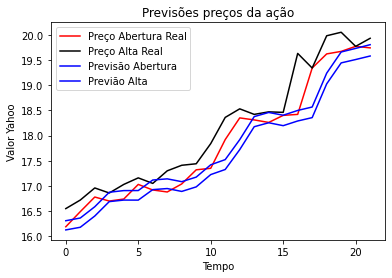

In [42]:
plt.plot(preco_real_open, color="red", label="Preço Abertura Real")
plt.plot(preco_real_hith, color="black", label="Preço Alta Real")

plt.plot(previsoes[:, 0], color="blue", label="Previsão Abertura")
plt.plot(previsoes[:, 1], color="blue", label="Previão Alta")
plt.title("Previsões preços da ação")
plt.xlabel("Tempo")
plt.ylabel("Valor Yahoo")
plt.legend()
plt.show()